## Practical 3: Implements Multinomial Logistic Regression (Iris Dataset)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn

In [3]:
seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_iris
iris_data = load_iris()

In [4]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

/tmp/ipykernel_22958/2513085242.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks=([0, 1, 2]));plt.show();x_label = 2;y_label=3;title='Petal'


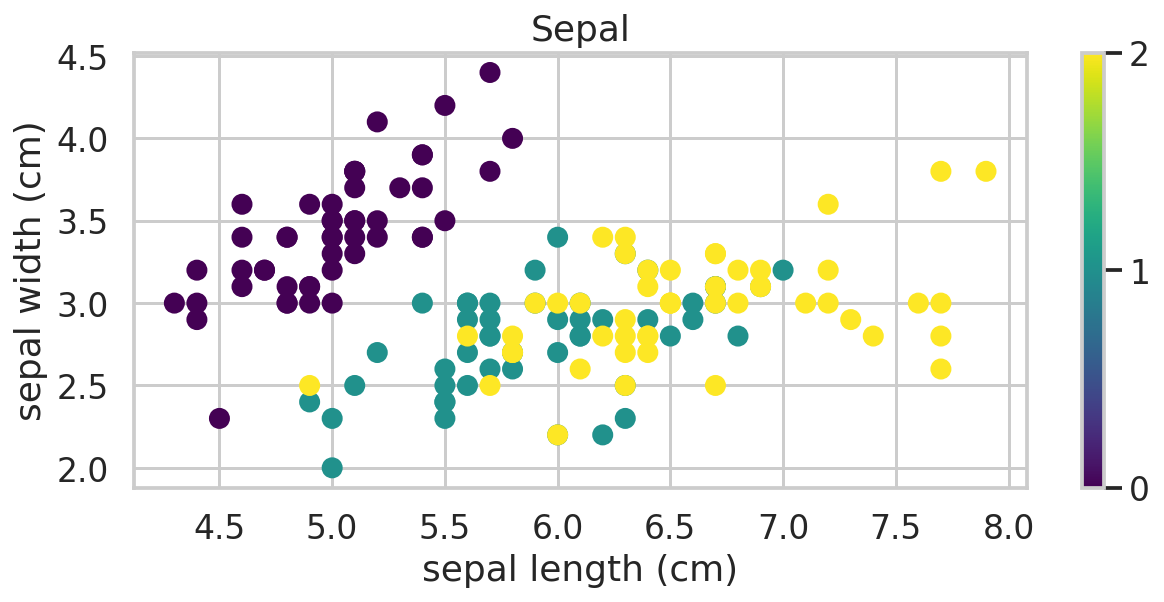

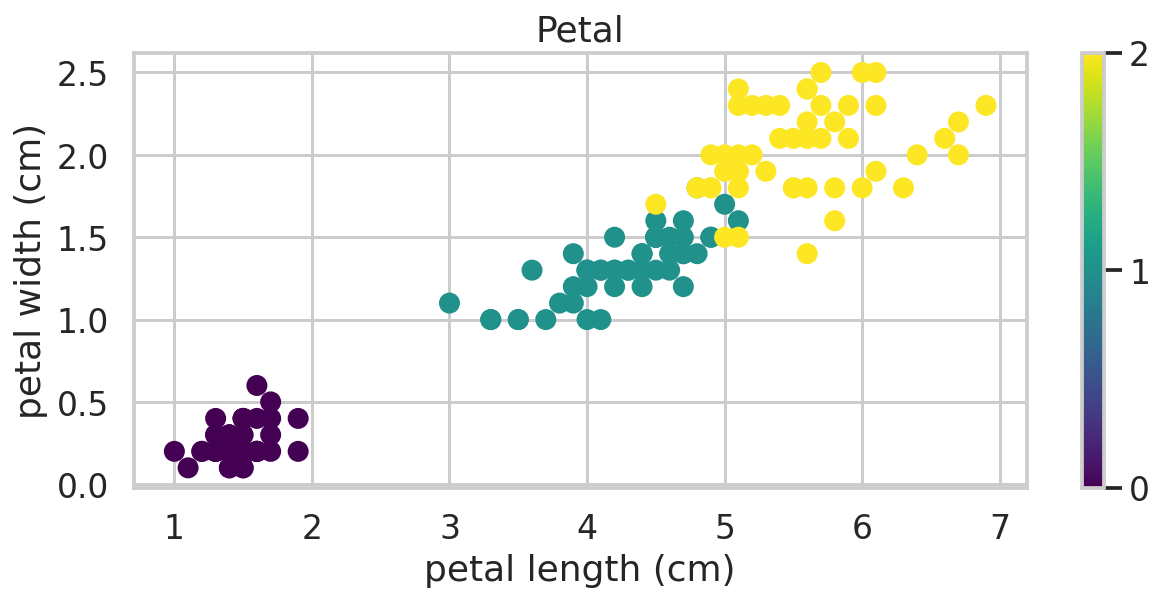

In [5]:
n_samples, n_features = iris_data.data.shape

def Show_Diagram(x_label,y_label,title):
    plt.figure(figsize=(10,4))
    plt.scatter(iris_data.data[:,x_label], iris_data.data[:,y_label], c=iris_data.target, cmap=cm.viridis)
    plt.xlabel(iris_data.feature_names[x_label]); plt.ylabel(iris_data.feature_names[y_label]); plt.title(title)
    plt.colorbar(ticks=([0, 1, 2]));plt.show();x_label = 2;y_label=3;title='Petal'

Show_Diagram(0,1,'Sepal')
Show_Diagram(2,3,'Petal')

In [7]:
random.seed(123)

def separate_data():
    ""
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((tA,tB,tC))
    return train,test

train_porcent = 80 # Train
test_porcent = 20 # Test
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

train_file , test_file = separate_data()

train_X = np.array([k[:4] for k in train_file])
train_y = np.array([k[4] for k in train_file])
test_X = np.array([k[:4] for k in test_file])
test_y = np.array([k[4] for k in test_file])

Text(0, 0.5, 'petal width (cm)')

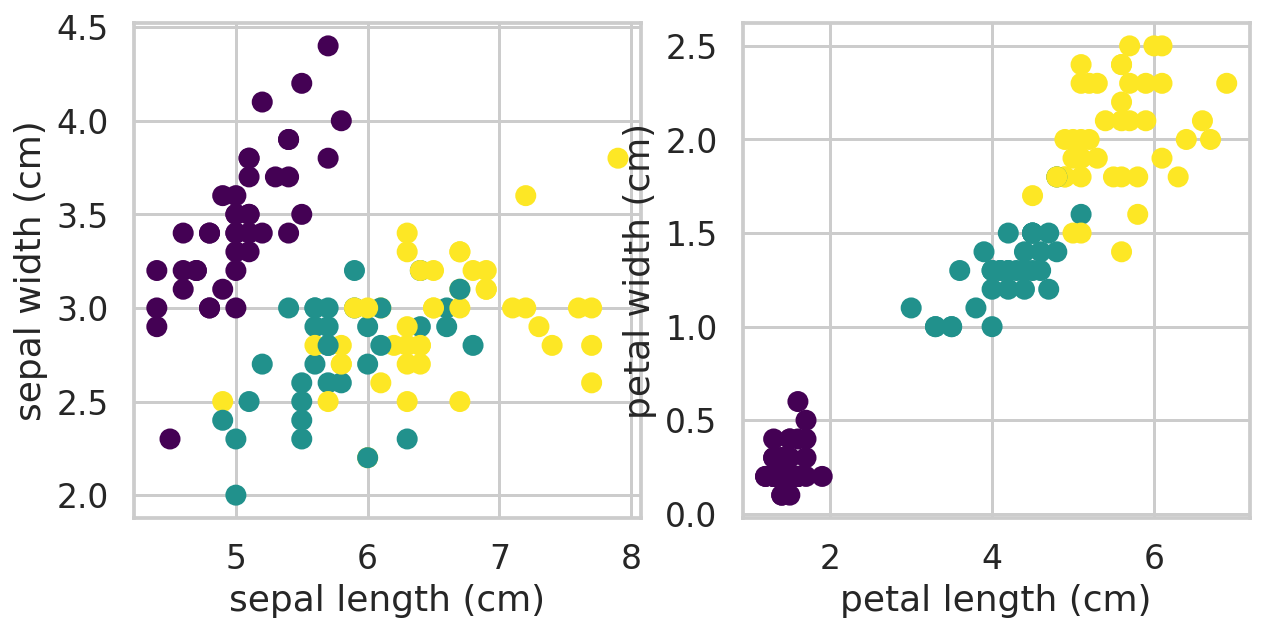

In [8]:
plt.figure(figsize=(10,10));plt.subplot(2,2,3)
plt.scatter(train_X[:,0],train_X[:,1],c=train_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0]); plt.ylabel(iris_data.feature_names[1]) 

plt.subplot(2,2,4);plt.scatter(train_X[:,2],train_X[:,3],c=train_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2]); plt.ylabel(iris_data.feature_names[3])

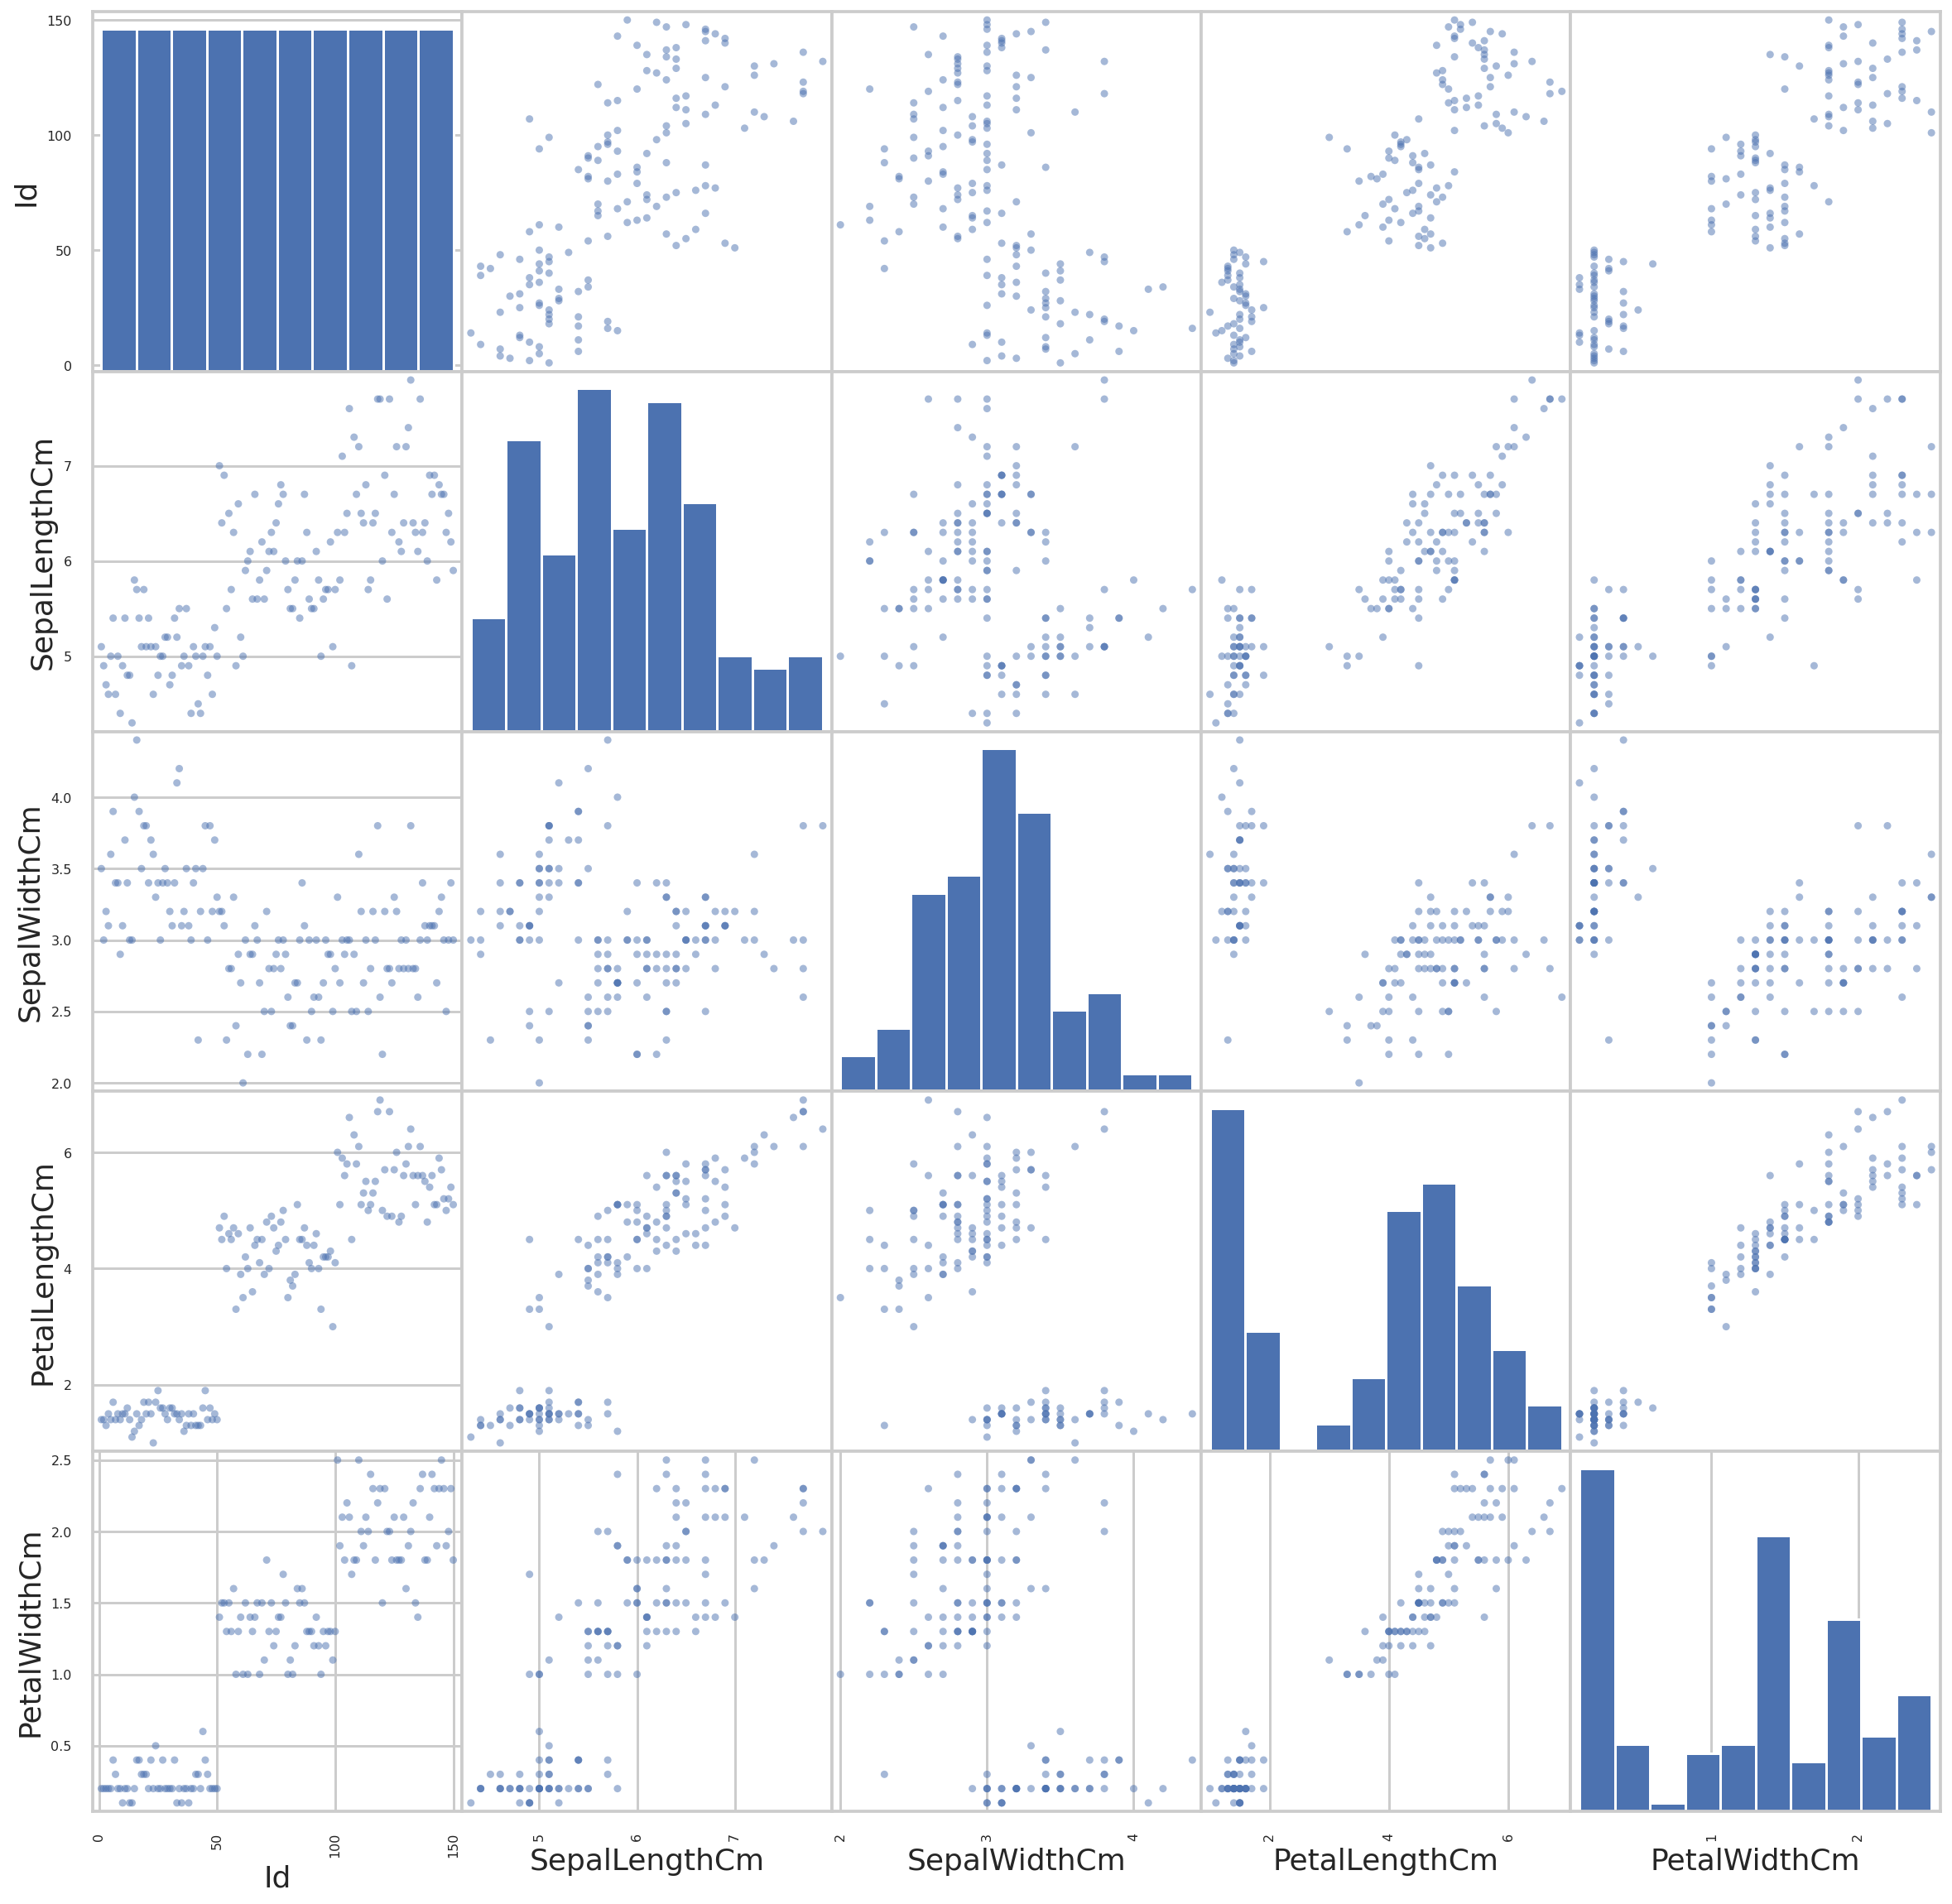

In [9]:
import pandas
from pandas.plotting import scatter_matrix


dataset = pandas.read_csv('Iris.csv')
scatter_matrix(dataset, alpha=0.5, figsize=(20, 20))
plt.show()

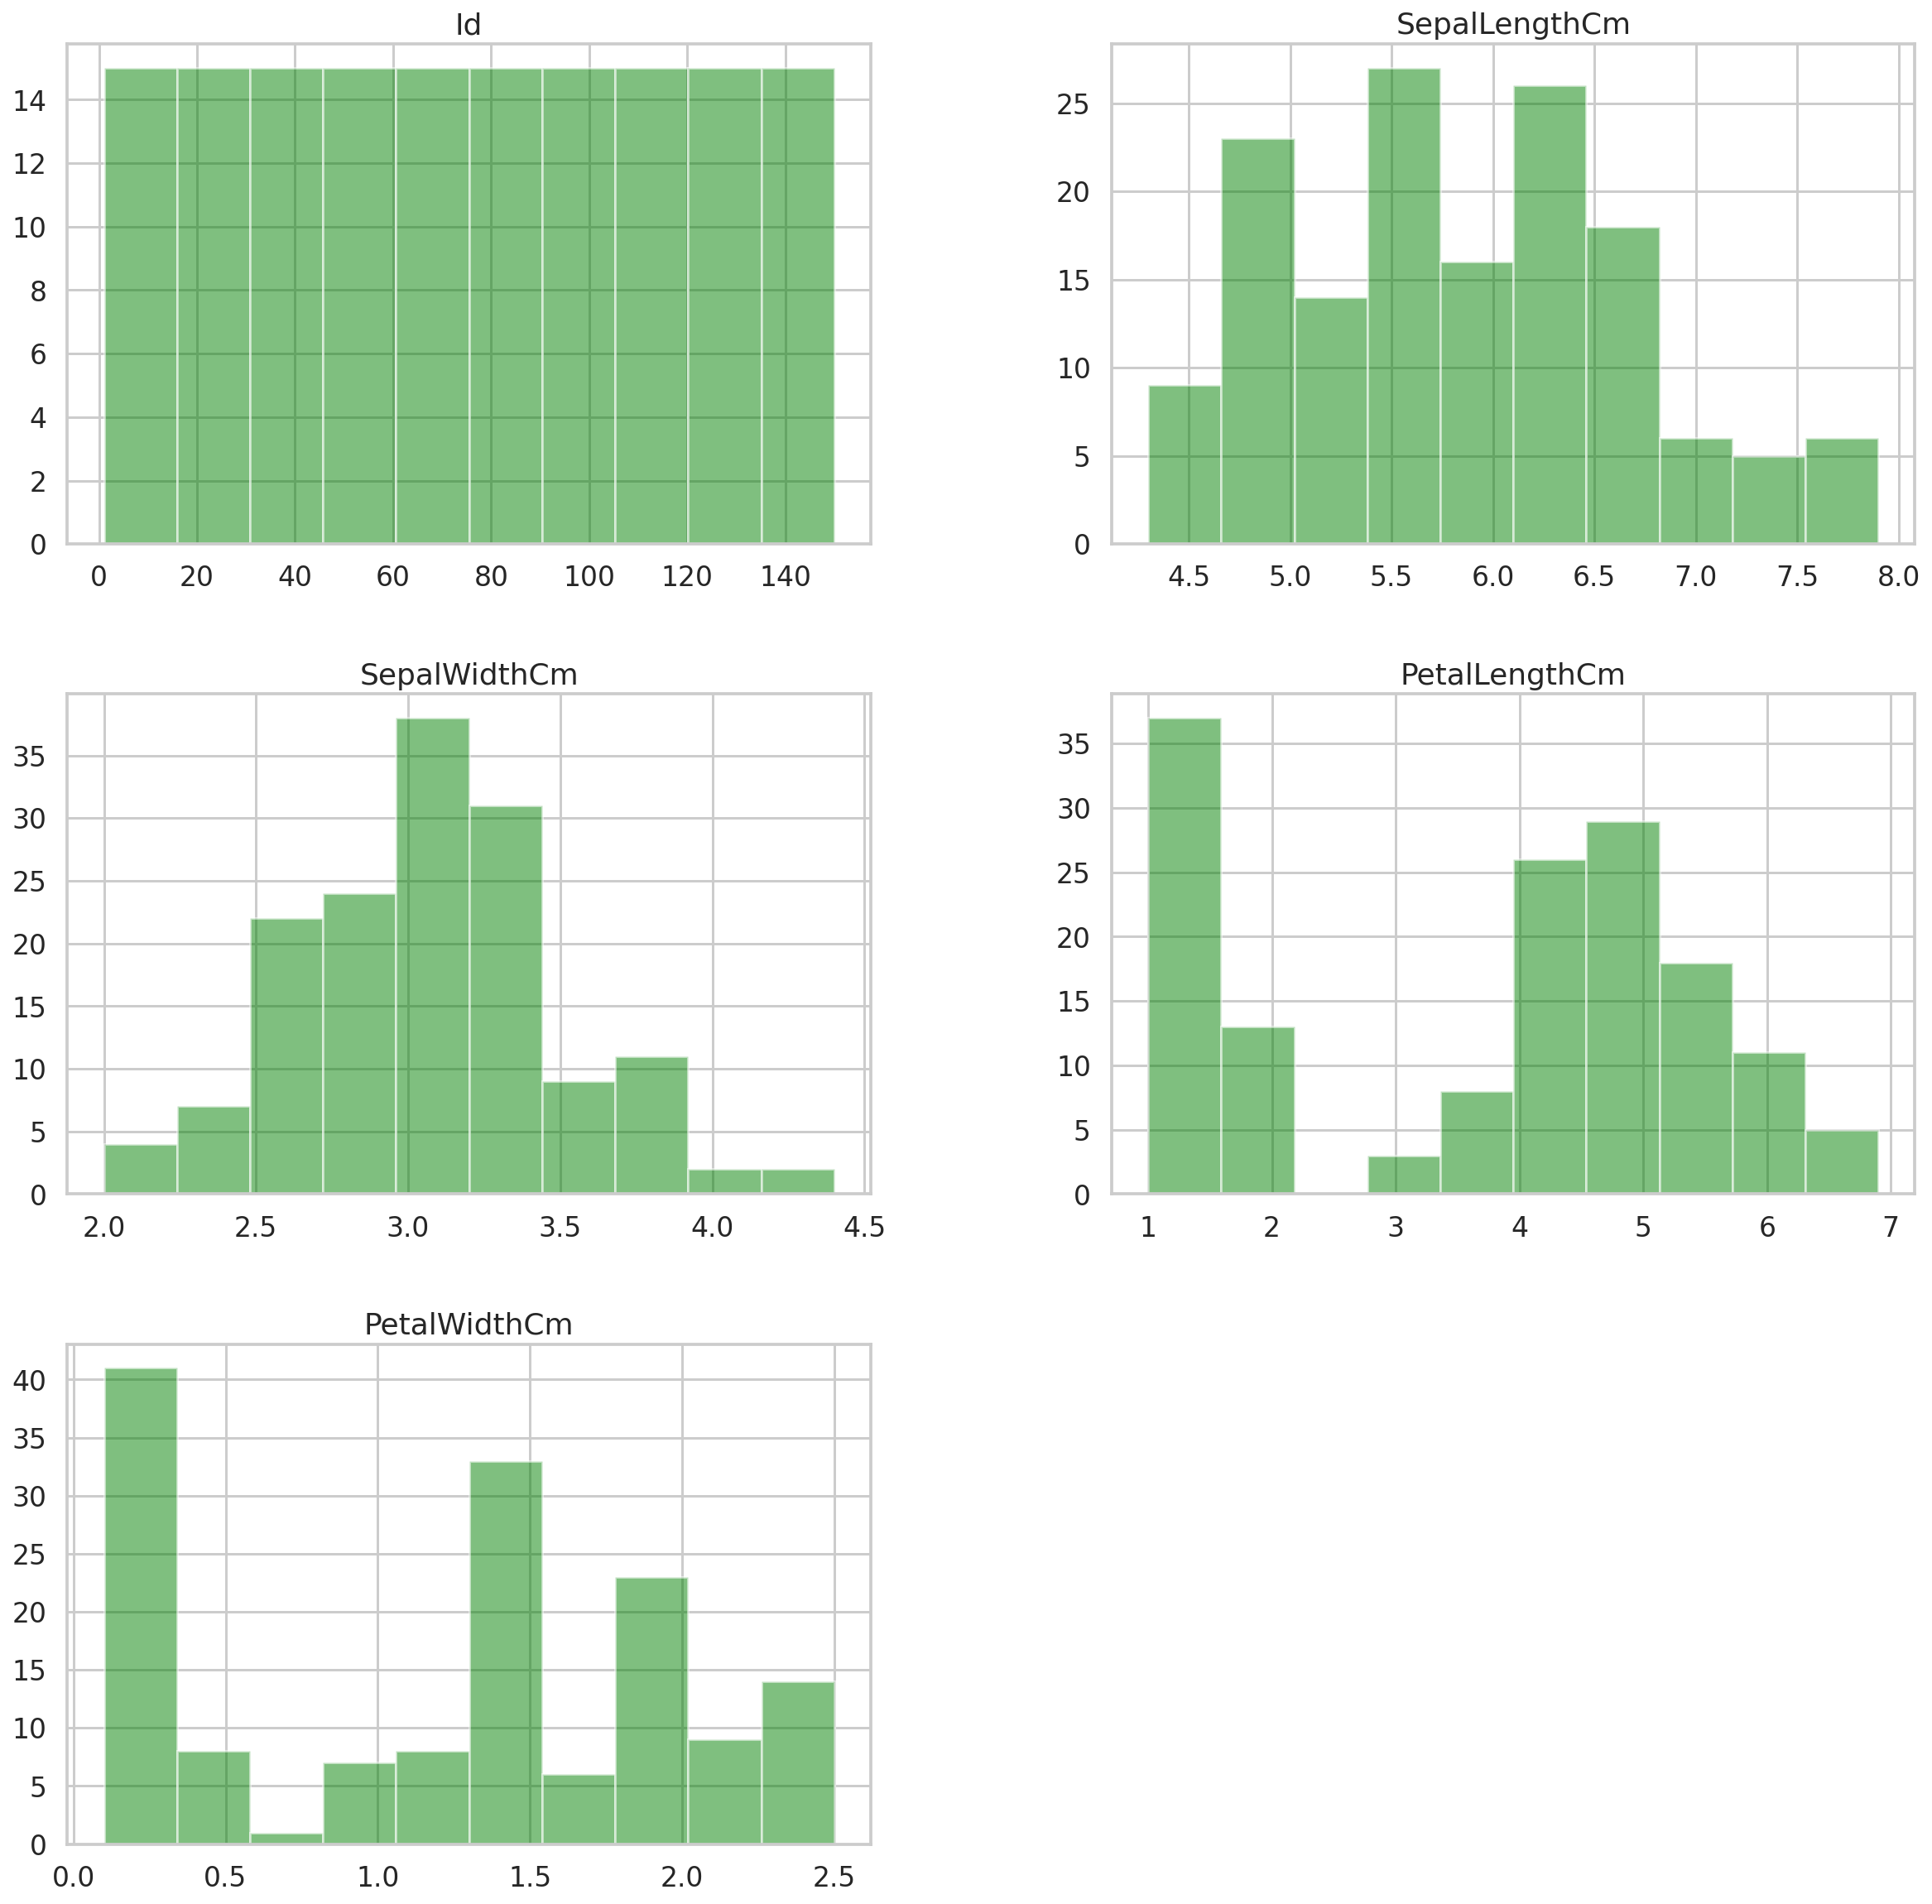

In [10]:
dataset.hist(alpha=0.5, figsize=(20, 20), color='green')
plt.show()

Text(0, 0.5, 'petal width (cm)')

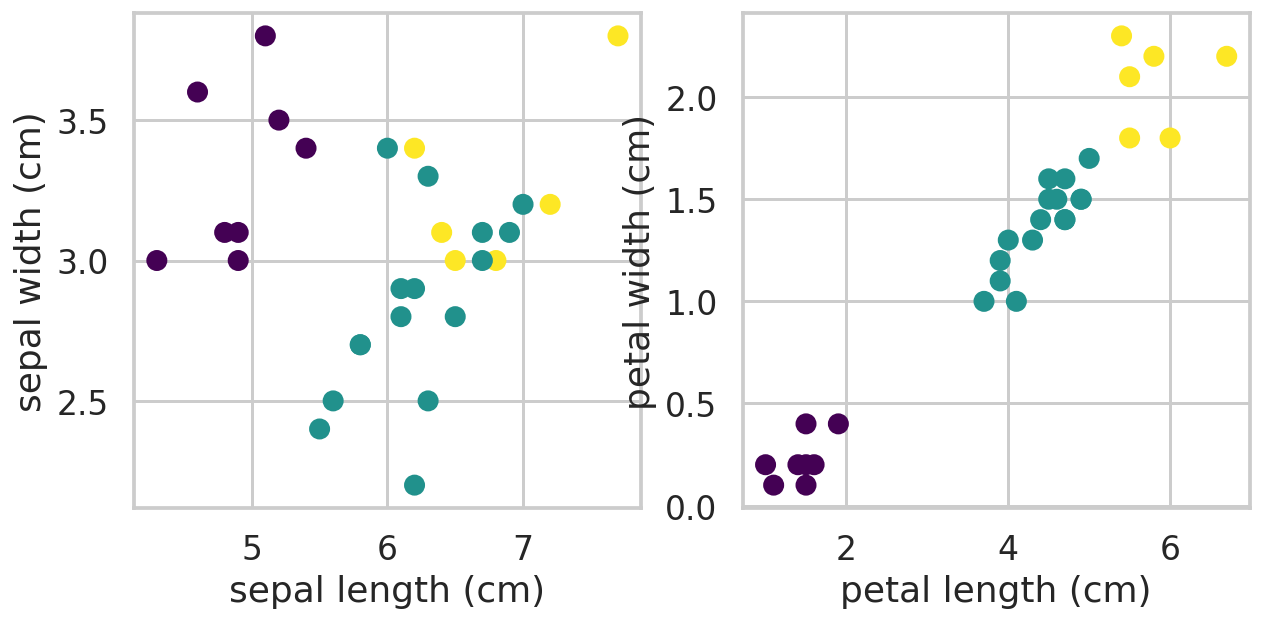

In [11]:
plt.figure(figsize=(10,10));plt.subplot(2,2,1)
plt.scatter(test_X[:,0],test_X[:,1],c=test_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0]); plt.ylabel(iris_data.feature_names[1]) 

plt.subplot(2,2,2);plt.scatter(test_X[:,2],test_X[:,3],c=test_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2]); plt.ylabel(iris_data.feature_names[3])

## Implementation Multinomial logistic (Softmax Regression)

In statistics, multinomial logistic regression is a classification method that generalizes logistic regression to multiclass problems, i.e. with more than two possible discrete outcomes. This is a model used to predict the probabilities of the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables (which may be real-valued, binary-valued, categorical-valued).

**Multinomial logistic regression ** is known by a variety of other names, including polytomous LR, multiclass LR, softmax regression, multinomial logit, maximum entropy (MaxEnt) classifier, conditional maximum entropy model.

** More information about it: [Softmax Regression](https://en.wikipedia.org/wiki/Multinomial_logistic_regression)**

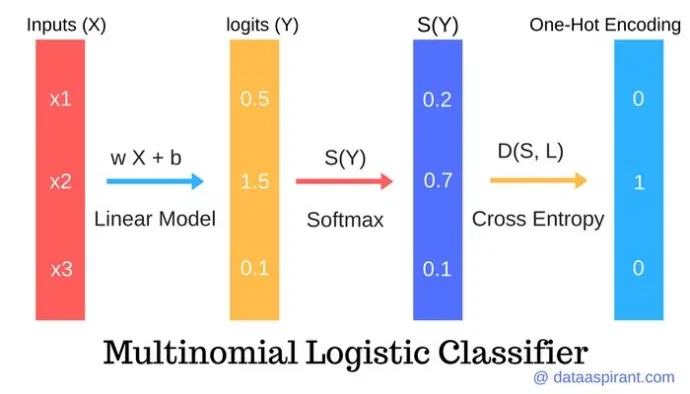

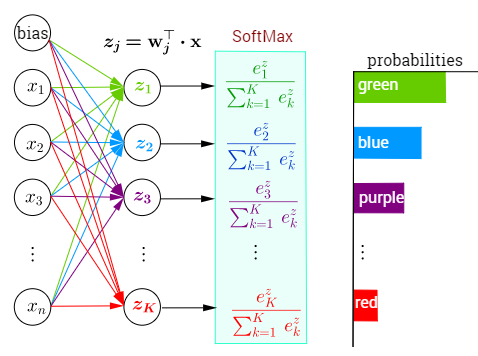

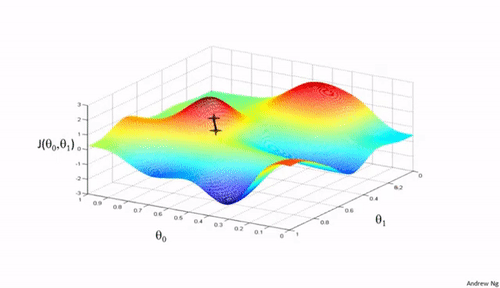


In [12]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin

class Multinomial_Regression(BaseEstimator, ClassifierMixin): 
    def __init__(self, X, y,params=None):     
        if (params == None):
            self.learningRate = 0.005                  # Learning Rate
            self.max_epoch = 3000                      
        else:
            self.learningRate = params['LearningRate']
            self.max_epoch = params['Epoch'] # Epochs
           
        self.weight = np.array([[0.1,0.2,0.3],
                               [0.1,0.2,0.3],
                               [0.1,0.2,0.3],
                               [0.1,0.2,0.3]])

    def cost_derivate_gradient(self,n,Ti,Oi, X):
        result = -(np.dot(X.T,(Ti - Oi)))/n   
        return result 

    def function_cost_J(self,n,Ti,Oi):
        result = -(np.sum(Ti * np.log(Oi)))/n 
        return result
    
    def one_hot_encoding(self,Y):
        OneHotEncoding = []
        encoding = []
        for i in range(len(Y)):
            if(Y[i] == 0): encoding = np.array([1,0,0]) #Class 1, if y = 0
            elif(Y[i] == 1): encoding = np.array([0,1,0]) #Class 2, if y = 1
            elif(Y[i] == 2): encoding = np.array([0,0,1]) #Class 3, if y = 2

            OneHotEncoding.append(encoding)
        return OneHotEncoding
    
    def accuracy_graphic(self, answer_graph):
        labels = 'Hits', 'Faults'
        sizes = [96.5, 3.3]
        explode = (0, 0.14)
        fig1, ax1 = plt.subplots()
        ax1.pie(answer_graph, explode=explode, colors=['green','red'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
        ax1.axis('equal')
        plt.show()

    def softmax(self,z):
        soft = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T 
        return soft
    
    def show_probability(self, arrayProbability):
        print("Probability: [ Class 0 ,  Class 1 , Class 2 ]")
        
        arrayTotal = []
        for k in arrayProbability:
            k[0] = "%.3f" % k[0]
            k[1] = "%.3f" % k[1]
            k[2] = "%.3f" % k[2]
            arrayTotal.append(k)
            
        for index, data in enumerate(arrayTotal):
            prob0 = data[0] * 100
            prob1 = data[1] * 100
            prob2 = data[2] * 100
            string = " {}: {}%, {}%, {}%".format(index, "%.3f" % prob0, "%.3f" % prob1, "%.3f" % prob2)
            print(string)
        
    def predict(self, X,y):
        acc_set = acc_vers = acc_virg = 0
        v_resp = []
        n = len(y)
        Z = np.matmul(X, self.weight)
        Oi = self.softmax(Z)
        prevision = np.argmax(Oi,axis=1)
        self.show_probability(Oi)
        print("")
        procent = sum(prevision == y)/n
        print(" ID-Sample  | Class Classification |  Output |   Hoped output  ")  
        for i in range(len(prevision)):
            if(prevision[i] == 0): print(" id :",i,"          | Iris-Setosa        |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 1): print(" id :",i,"          | Iris-Versicolour   |  Output:",prevision[i],"   |",y[i])
            elif(prevision[i] == 2): print(" id :",i,"          | Iris-Virginica     |  Output:",prevision[i],"   |",y[i])
                
        for i in range(len(prevision)):
            if((prevision[i] == y[i])and(prevision[i] == 0)):acc_set+=1
            elif((prevision[i] == y[i])and(prevision[i] == 1)):acc_vers+=1
            elif((prevision[i] == y[i])and(prevision[i] == 2)):acc_virg+=1
               
        correct = procent * 100
        incorrect = 100 - correct
        v_resp.append(correct)
        v_resp.append(incorrect)
        self.accuracy_graphic(v_resp)
        return "%.2f"%(correct), acc_set, acc_vers, acc_virg

    def show_err_graphic(self,v_epoch,v_error):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoch, v_error, "m-")
        plt.xlabel("Number of Epoch")
        plt.ylabel("Error")
        plt.title("Error Minimization")
        plt.show()

    def fit(self,X,y):
        v_epochs = []
        totalError = []
        epochCount = 0
        n = len(X)
        gradientE = []
        while(epochCount < self.max_epoch):
            Ti = self.one_hot_encoding(y)
            Z = np.matmul(X,self.weight)
            Oi = self.softmax(Z)
            erro = self.function_cost_J(n,Ti,Oi)
            gradient = self.cost_derivate_gradient(n,Ti,Oi,X)
            self.weight = self.weight - self.learningRate * gradient
            if(epochCount % 100 == 0):
                totalError.append(erro)
                gradientE.append(gradient)
                v_epochs.append(epochCount)
                print("Epoch ",epochCount," Total Error:", "%.4f" % erro)
            
            epochCount += 1
        
        self.show_err_graphic(v_epochs,totalError)
        return self

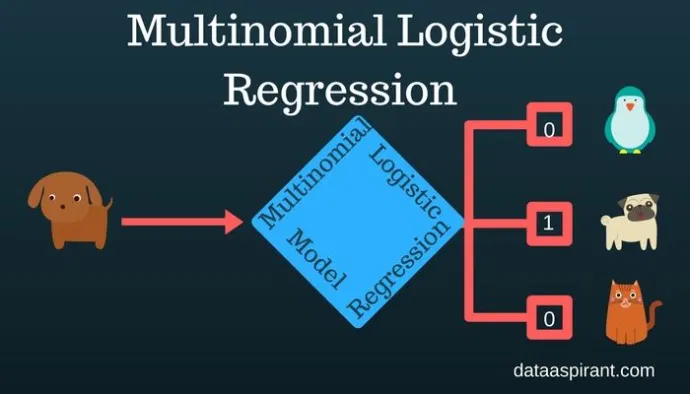

Epoch  0  Total Error: 1.3997
Epoch  100  Total Error: 0.7937
Epoch  200  Total Error: 0.6698
Epoch  300  Total Error: 0.5987
Epoch  400  Total Error: 0.5524
Epoch  500  Total Error: 0.5195
Epoch  600  Total Error: 0.4945
Epoch  700  Total Error: 0.4744
Epoch  800  Total Error: 0.4577
Epoch  900  Total Error: 0.4434
Epoch  1000  Total Error: 0.4310
Epoch  1100  Total Error: 0.4199
Epoch  1200  Total Error: 0.4099
Epoch  1300  Total Error: 0.4008
Epoch  1400  Total Error: 0.3924
Epoch  1500  Total Error: 0.3846
Epoch  1600  Total Error: 0.3773
Epoch  1700  Total Error: 0.3705
Epoch  1800  Total Error: 0.3640
Epoch  1900  Total Error: 0.3579
Epoch  2000  Total Error: 0.3522
Epoch  2100  Total Error: 0.3467
Epoch  2200  Total Error: 0.3414
Epoch  2300  Total Error: 0.3364
Epoch  2400  Total Error: 0.3316
Epoch  2500  Total Error: 0.3269
Epoch  2600  Total Error: 0.3225
Epoch  2700  Total Error: 0.3182
Epoch  2800  Total Error: 0.3141
Epoch  2900  Total Error: 0.3101
Epoch  3000  Total Err

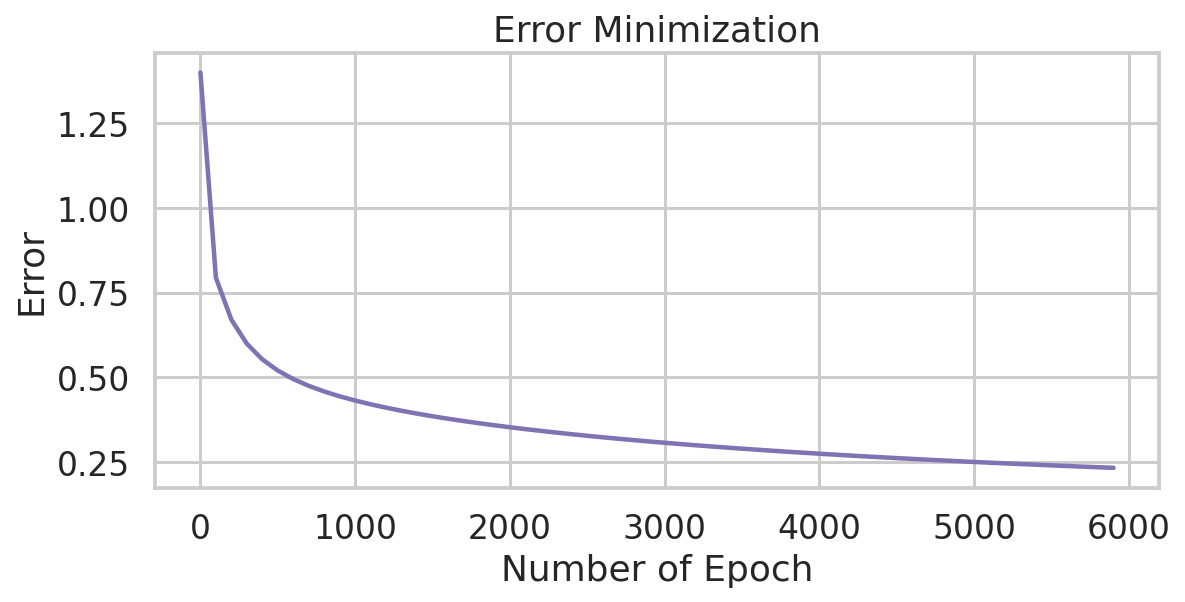

AttributeError: 'Multinomial_Regression' object has no attribute 'X'

AttributeError: 'Multinomial_Regression' object has no attribute 'X'

AttributeError: 'Multinomial_Regression' object has no attribute 'X'

In [15]:
arguments = {'Epoch':6000, 'LearningRate':0.005}
SoftmaxRegression = Multinomial_Regression(train_X,train_y,arguments)
SoftmaxRegression.fit(train_X,train_y)

Probability: [ Class 0 ,  Class 1 , Class 2 ]
 0: 94.800%, 5.200%, 0.000%
 1: 4.000%, 73.700%, 22.300%
 2: 1.200%, 58.400%, 40.400%
 3: 92.300%, 7.700%, 0.000%
 4: 1.600%, 66.600%, 31.800%
 5: 2.300%, 63.400%, 34.300%
 6: 1.700%, 73.000%, 25.300%
 7: 5.700%, 78.000%, 16.300%
 8: 96.000%, 4.000%, 0.000%
 9: 0.000%, 19.100%, 80.900%
 10: 0.100%, 21.900%, 78.000%
 11: 4.700%, 81.600%, 13.700%
 12: 5.600%, 76.300%, 18.000%
 13: 3.400%, 82.800%, 13.800%
 14: 93.900%, 6.000%, 0.000%
 15: 0.100%, 31.500%, 68.400%
 16: 0.400%, 43.100%, 56.500%
 17: 4.200%, 78.600%, 17.200%
 18: 5.400%, 77.100%, 17.500%
 19: 0.800%, 53.700%, 45.500%
 20: 3.600%, 63.200%, 33.200%
 21: 0.100%, 25.100%, 74.800%
 22: 3.700%, 76.000%, 20.400%
 23: 93.900%, 6.100%, 0.000%
 24: 96.600%, 3.400%, 0.000%
 25: 0.100%, 13.300%, 86.600%
 26: 0.000%, 9.000%, 91.000%
 27: 98.700%, 1.300%, 0.000%
 28: 0.500%, 48.300%, 51.100%
 29: 96.100%, 3.900%, 0.000%

 ID-Sample  | Class Classification |  Output |   Hoped output  
 id : 0 

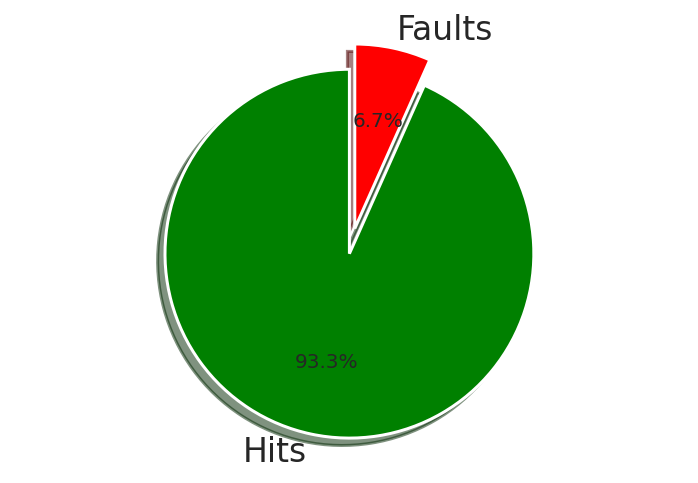

Hits - Porcent (Test):  93.33 % hits


In [16]:
acc_test,test_set,test_vers,test_virg = SoftmaxRegression.predict(test_X,test_y)
print("Hits - Porcent (Test): ", acc_test,"% hits")

- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 87.50 %
- Acurracy Iris-Virginica: 100.00 %


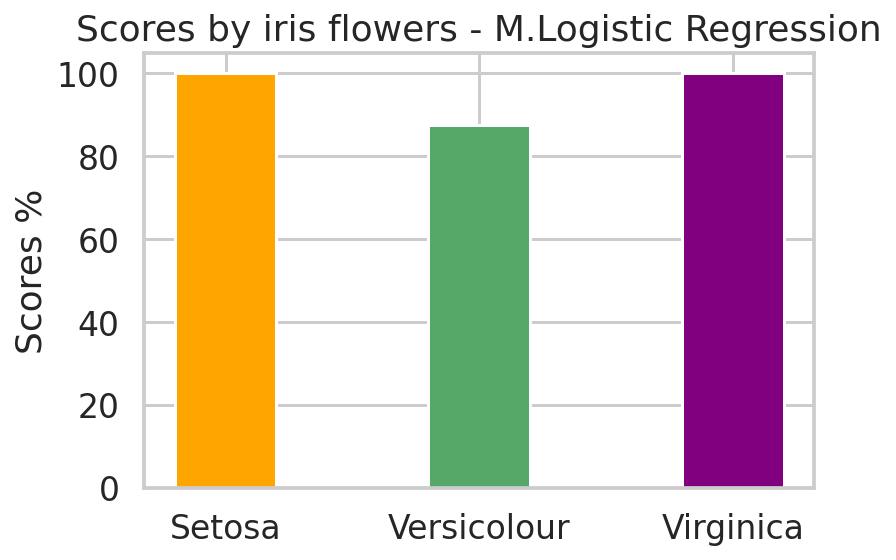

In [17]:
n_set = 0
n_vers = 0
n_virg = 0
for i in range(len(test_y)):
    if(test_y[i] == 0):
        n_set+=1
    elif(test_y[i] == 1):
        n_vers+=1
    elif(test_y[i] == 2):
        n_virg+=1
        
ac_set = (test_set/n_set) * 100
ac_vers = (test_vers/n_vers) * 100
ac_virg = (test_virg/n_virg) * 100

print("- Acurracy Iris-Setosa:","%.2f"%ac_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%ac_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%ac_virg, "%")

ig, ax = plt.subplots()

plt.bar(2.0, ac_set,color='orange')
plt.bar(4.0, ac_vers,color='g')
plt.bar(6.0, ac_virg,color='purple',label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks([2.0, 4.0, 6.0], ["Setosa","Versicolour","Virginica"])
plt.title('Scores by iris flowers - M.Logistic Regression')
plt.show()